# 25th March Assignment

# Flight Price

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [2]:
df = pd.read_excel('flight_price.xlsx')

In [3]:
df.shape

(10683, 11)

- > Dataset have 10683 rows and 11 columns.

## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

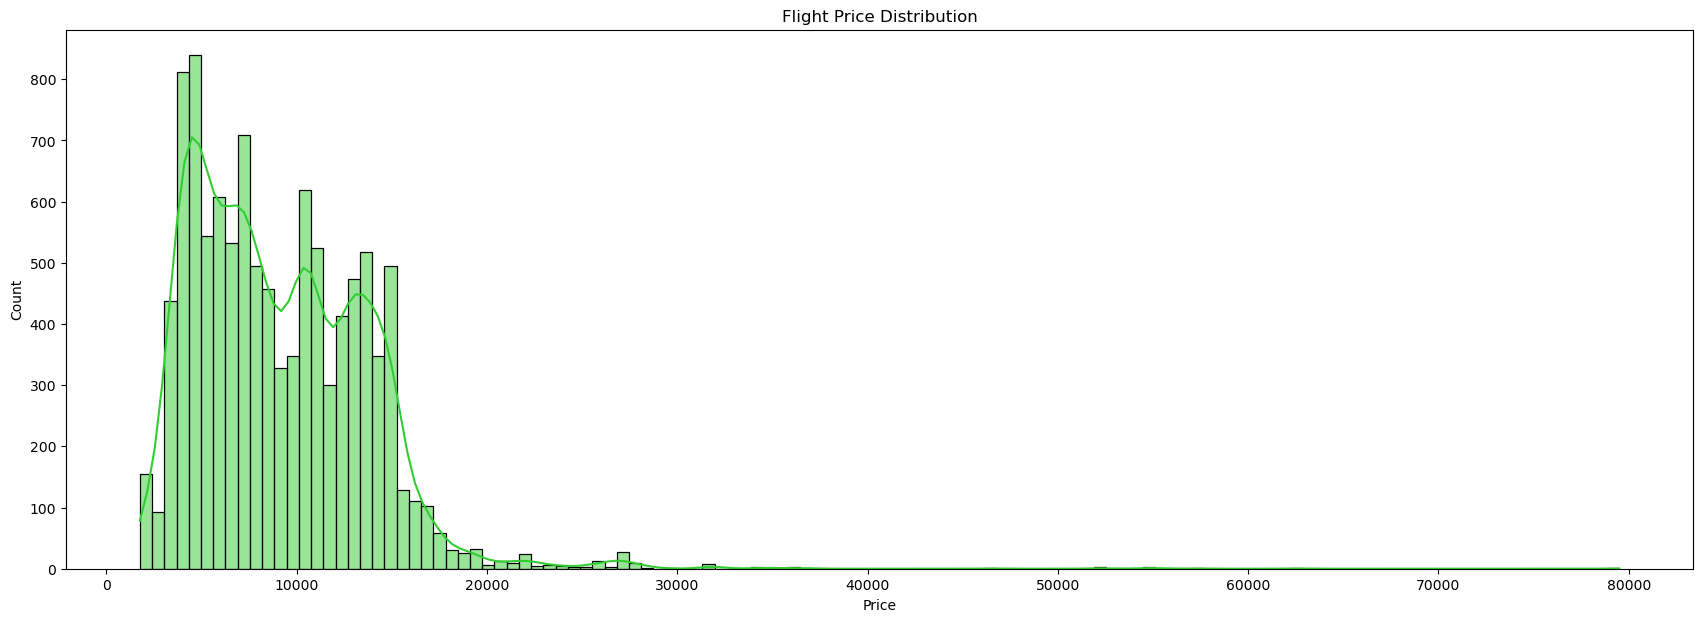

In [4]:
plt.figure(figsize=(21,7))
sns.histplot(x='Price',data=df,kde=True,color='#32cd32')
plt.title('Flight Price Distribution')
plt.show()

## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
df['Price'].min()

1759

In [6]:
df['Price'].max()

79512

- > The range of flight prices is between 1759 to 79512 , where 1759 is minimum and 79512 is maximum flight price.

## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

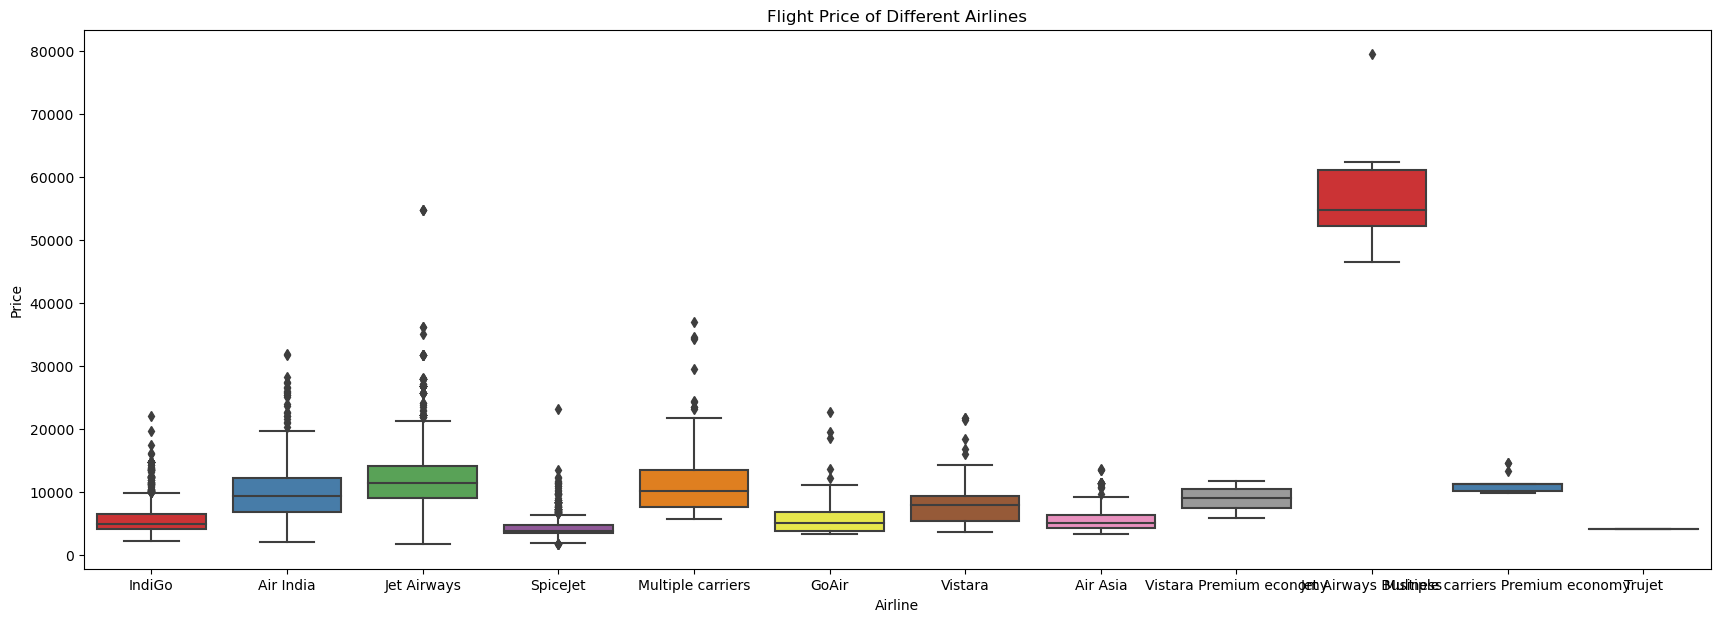

In [7]:
plt.figure(figsize=(21,7))
sns.boxplot(x='Airline',y='Price',data=df,palette='Set1')
plt.title('Flight Price of Different Airlines')
plt.show()

- > The average flight price of Airlines is between 5000-10000.

- > But there is a airline name 'Jet Airways Business' takes high price of flight,and the range of its flight price is between 50000-65000.

- > The maximum flight price is also of 'Jet Airways Business' airline.

## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

- > There is only one feature in this dataset to check outlier with boxplot and that is flight prices.

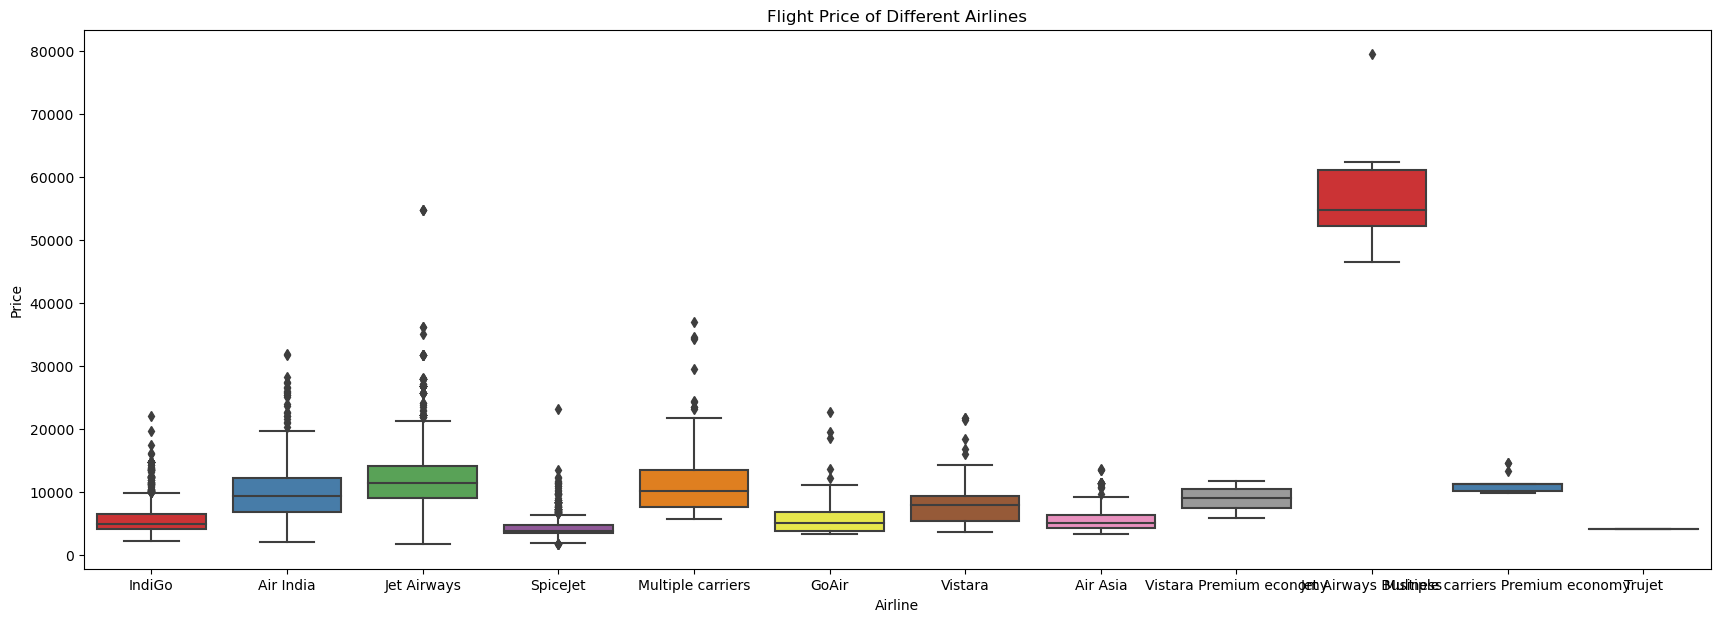

In [8]:
plt.figure(figsize=(21,7))
sns.boxplot(x='Airline',y='Price',data=df,palette='Set1')
plt.title('Flight Price of Different Airlines')
plt.show()

- > This boxplot shows us the different flight prices according to differetn airlines.

- > From this boxplot we can see clearly there is mulitple outliers in the dataset , which is not good for any dataset.

- > 'IndiGo' and 'jet Airways' contains the most of outliers.

- > Outliers affects when we training or testing any model.

- > Because of outliers we get poor accuracy from the model and model doesn't perform well.

## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

- > I will choose 'Date_of_Journey' feature to identify the peak season.

In [9]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

/tmp/ipykernel_77/4110469324.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [10]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [12]:
to_boss = df.groupby(['Month'])['Price'].sum().sort_values(ascending=False).reset_index()
to_boss.Price = to_boss.Price / 10000000

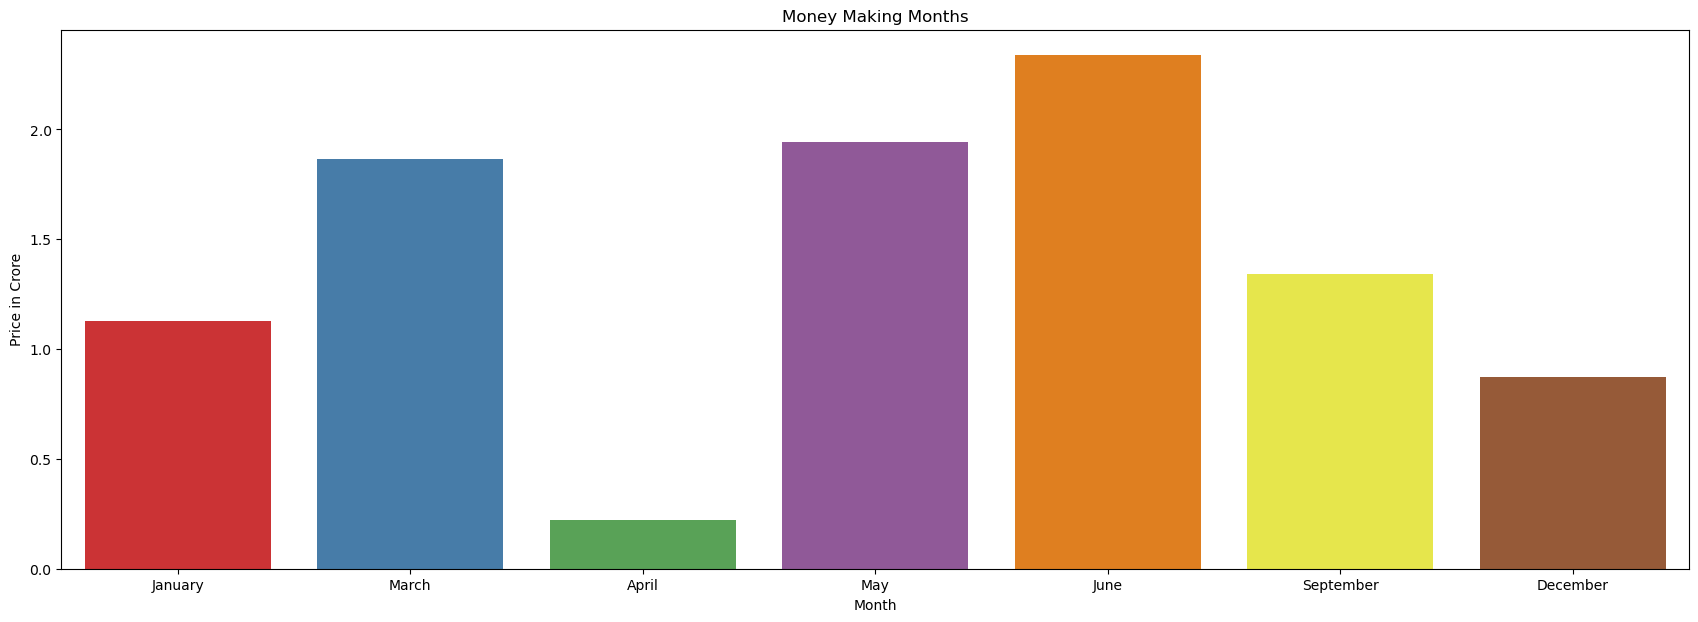

In [13]:
plt.figure(figsize=(21,7))
sns.barplot(x='Month',y='Price',data=to_boss,palette='Set1')
plt.title('Money Making Months')
plt.xticks(np.arange(7),['January','March','April','May','June','September','December'])
plt.ylabel('Price in Crore')
plt.show()

- > There are most important feature in this dataset to know about peak season that is 'Date_of_Journey'.

- > With the help of above barplot we can clearly see that the peak season is 'Starting of Summer' and 'Ending of Summer'.

- > 'June' is the most earning month according to the barplot.

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

- > First one is Destination Feature.

- > From the destination feature we can know about where people like to go and from which destination airlines earned most of the money.

In [14]:
trends = df.groupby(['Destination'])['Price'].sum().sort_values(ascending=False).reset_index()[0:10]

In [15]:
trends.Price = trends.Price / 10000000

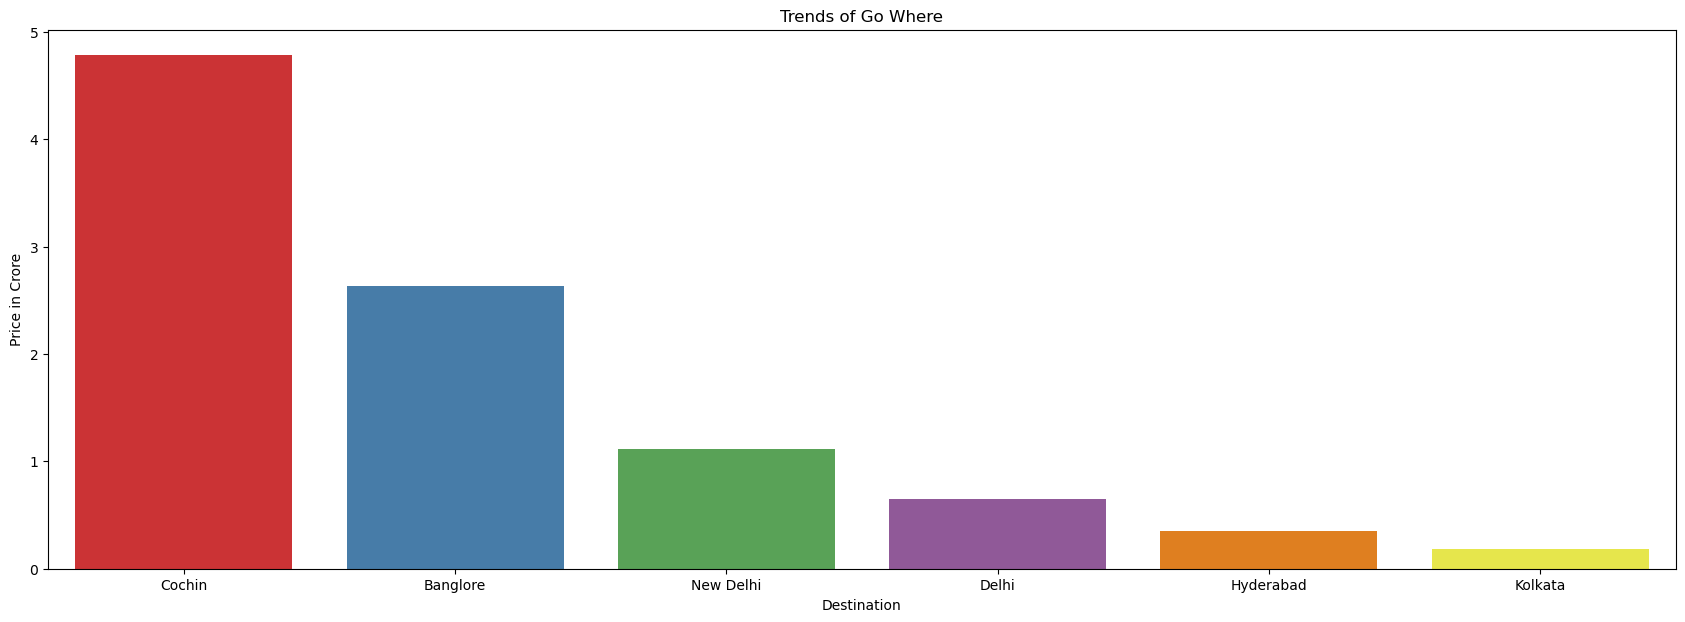

In [16]:
plt.figure(figsize=(21,7))
sns.barplot(x='Destination',y='Price',data=trends,palette='Set1')
plt.title('Trends of Go Where')
plt.xticks(np.arange(6),['Cochin','Banglore','New Delhi','Delhi','Hyderabad','Kolkata'])
plt.ylabel('Price in Crore')
plt.show()

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

- > There are multiple features that affects flight prices.

1. Airline - Different airlines have their different types services and according to that service they charges the flight price.

2. Total Stops - If the route is too long so flight will take some stops , that also affects the flight prices.

3. Duration - Small duration flights not that much high but long duration flights contain high prices,because most of the long time duration flights have long route.

## Airline

In [17]:
effect = df.groupby(['Airline'])['Price'].sum().sort_values(ascending=False).reset_index()
effect.Price = effect.Price / 10000000

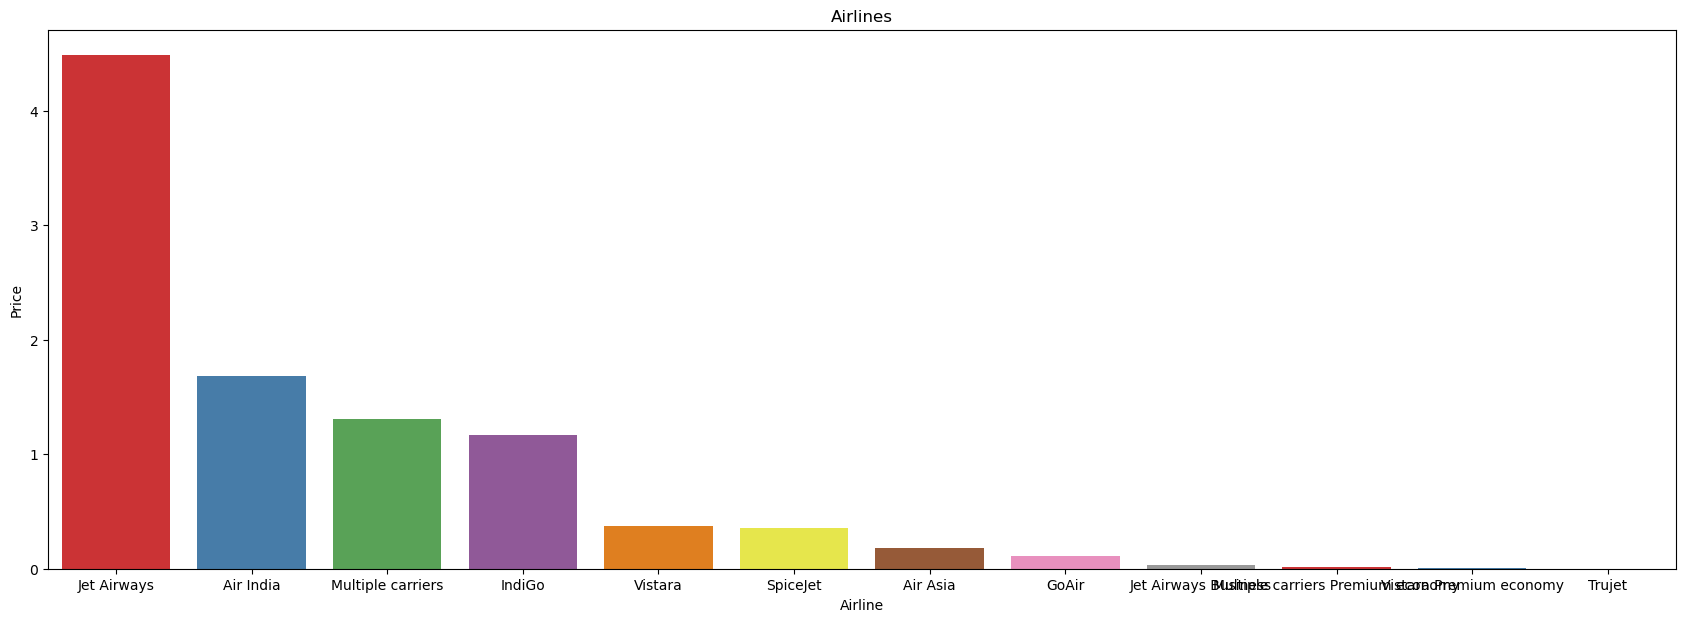

In [18]:
plt.figure(figsize=(21,7))
sns.barplot(x='Airline',y='Price',data=effect,palette='Set1')
plt.title('Airlines')
plt.show()

## Total Stops

In [19]:
effect = df.groupby(['Total_Stops'])['Price'].sum().sort_values(ascending=False).reset_index()
effect.Price = effect.Price / 10000000

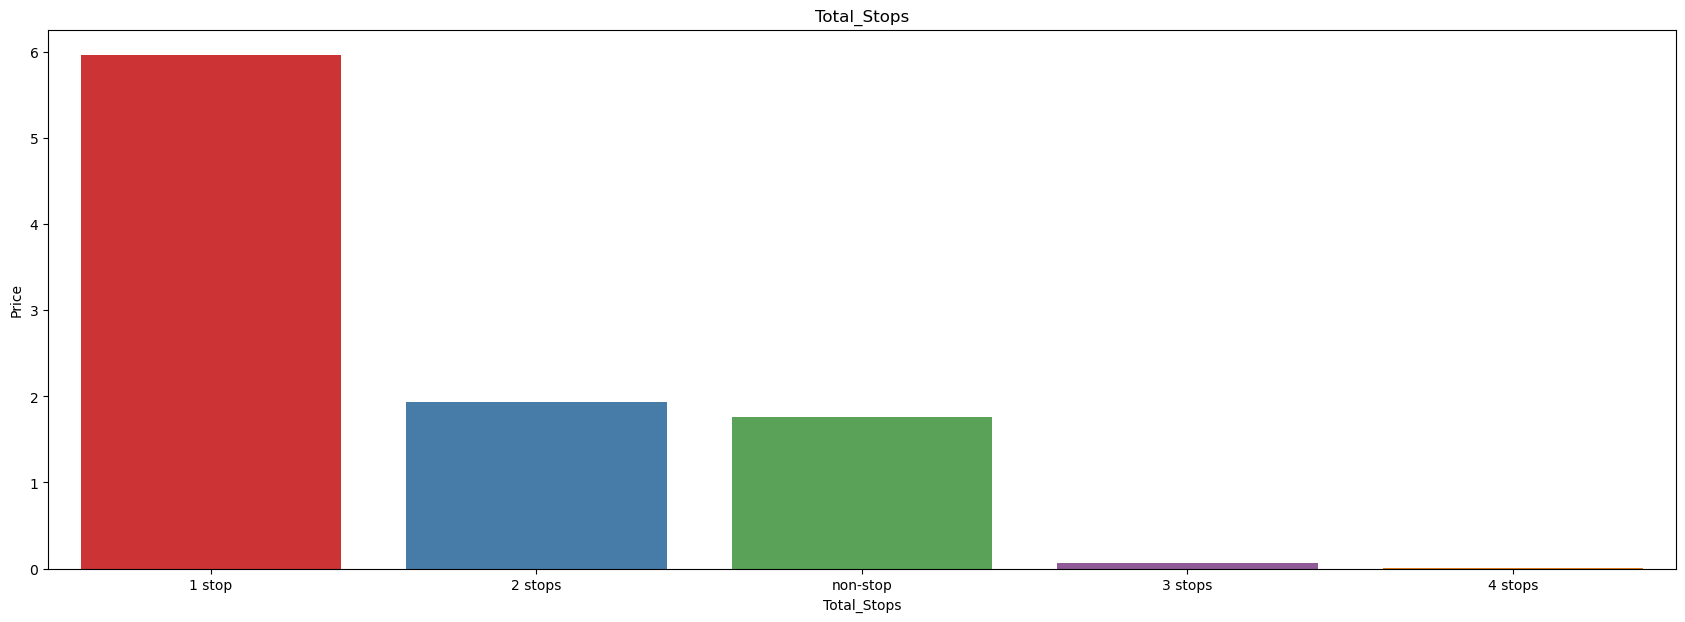

In [20]:
plt.figure(figsize=(21,7))
sns.barplot(x='Total_Stops',y='Price',data=effect,palette='Set1')
plt.title('Total_Stops')
plt.show()

## Duration

In [21]:
effect = df.groupby(['Duration'])['Price'].sum().sort_values(ascending=False).reset_index()[0:10]
effect.Price = effect.Price / 10000000

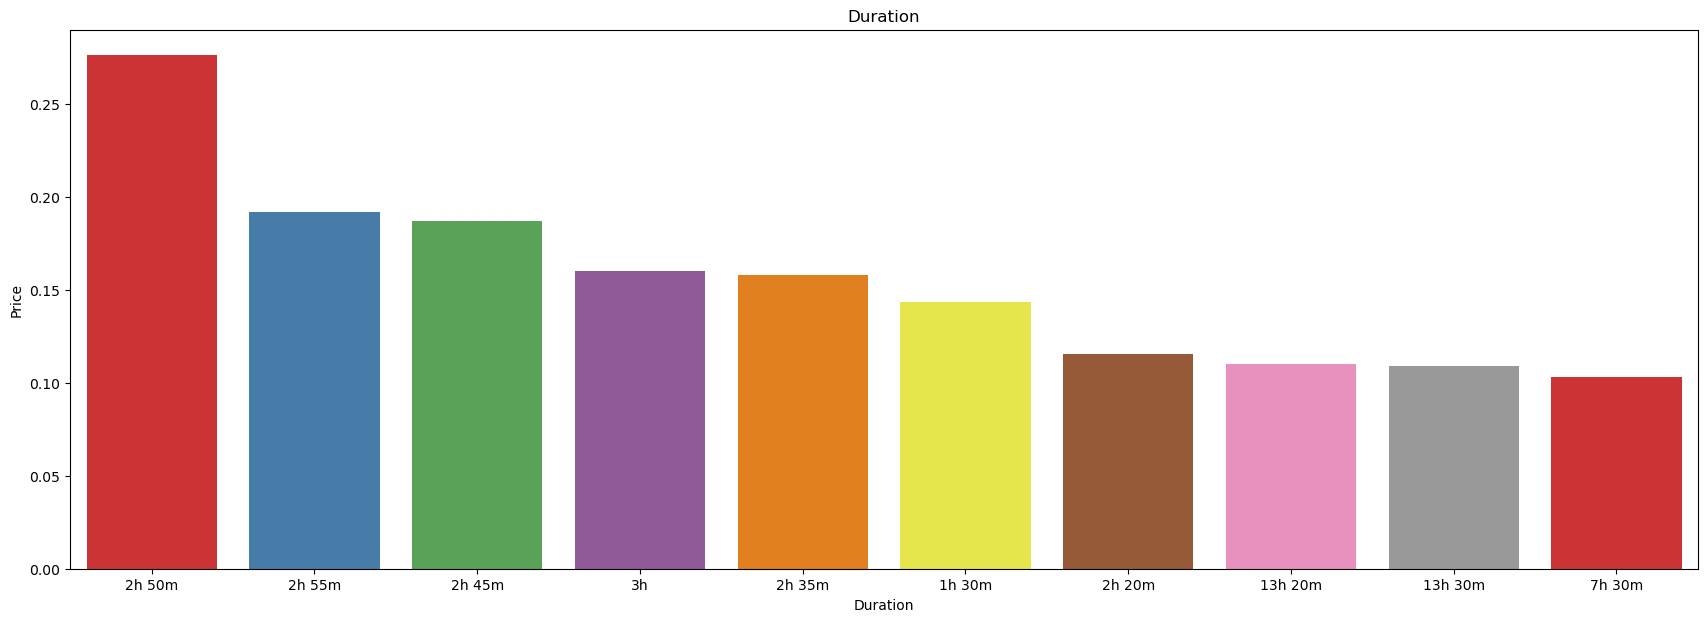

In [22]:
plt.figure(figsize=(21,7))
sns.barplot(x='Duration',y='Price',data=effect,palette='Set1')
plt.title('Duration')
plt.show()

# Google PLaystore

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
df.shape

(10841, 13)

- > There is 10841 rows and 13 columns in dataset.

## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.


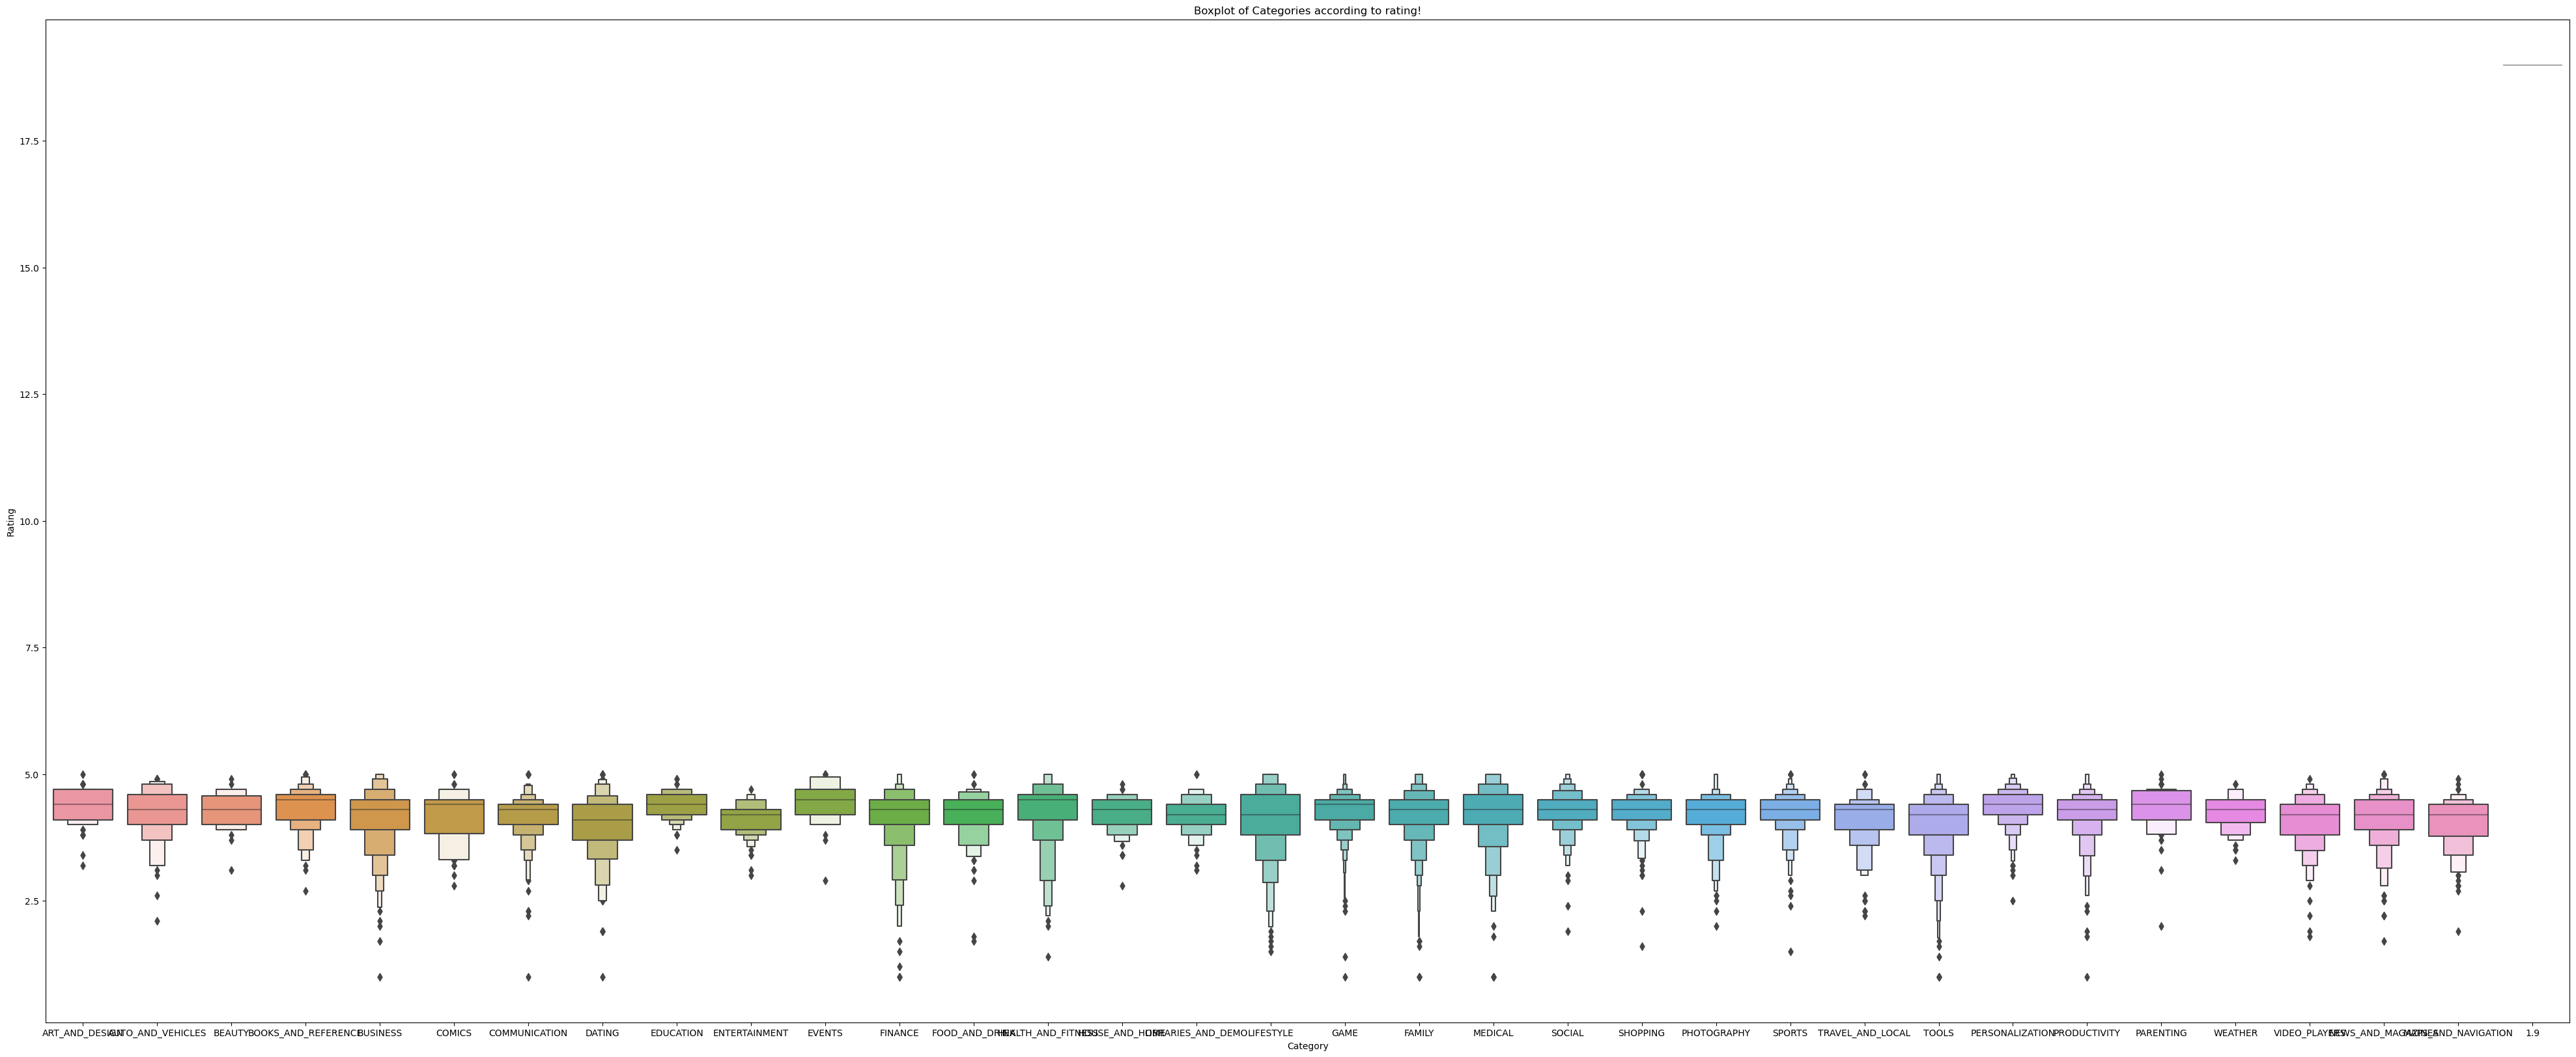

In [4]:
plt.figure(figsize=(50,20))
sns.boxenplot(x='Category',y='Rating',data=df)
plt.title('Boxplot of Categories according to rating!')
plt.show()

## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- > Yes,there is some missing values in different categories.

- > But only one category 'Rating' can impact our analysis cause it has most of missing the values.

- > Missing values are not good for model training and testing.

- > Because of missing values model can't take proper decision.

- > We can solve the problem of missing value by 4 techniques :
    
    1. Delete the rows or columns.
    
    2. Mean(For numeric values)
    
    3. Median(For numeric values)
    
    4. Mode(For categorical values)

## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.


In [6]:
df[['Size','Rating']].corr()

/tmp/ipykernel_70/3428967031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['Size','Rating']].corr()


,Rating
Rating,1.0


In [7]:
char = [',','+']

for i in char :
    df['Size'] = df['Size'].str.replace(i,'')

/tmp/ipykernel_70/866843233.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Size'] = df['Size'].str.replace(i,'')


In [8]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=df['Size'].astype(float)

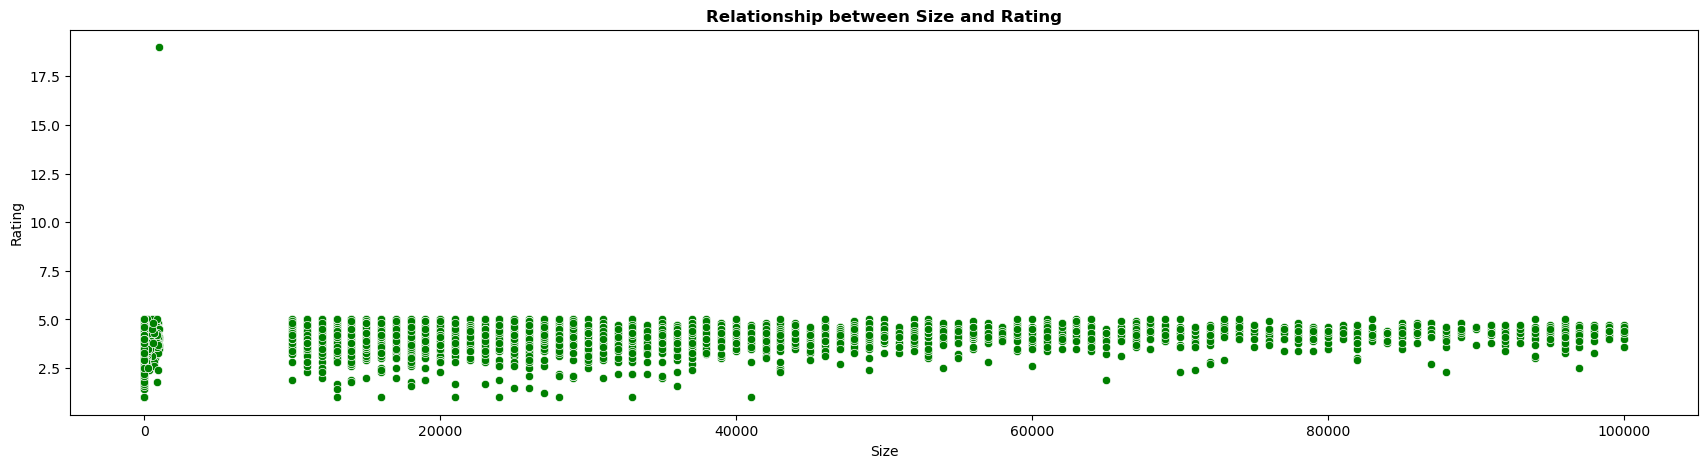

In [9]:
plt.figure(figsize=(21,5))
sns.scatterplot(x='Size',y='Rating',data=df,color='g')
plt.title('Relationship between Size and Rating',weight='bold')
plt.show()

- > According to correlation and graph we can say that there is no strong relationship between 'Size' and 'Rating' of the app.

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

- > We can't creat barplot with type of app,because every free type has price 0 so there is no mean of creating barplot using type.

- > I am going to creat bar plot  according to category of app.

In [10]:
df['Price'] = df['Price'].str.replace('$','')

/tmp/ipykernel_70/1580091000.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','')


In [11]:
df['Price'] = df['Price'].replace('Everyone',np.nan)

In [12]:
df['Price'] = df['Price'].astype(float)

In [22]:
new = df.groupby(['Category'])['Price'].sum().sort_values(ascending=False).reset_index()

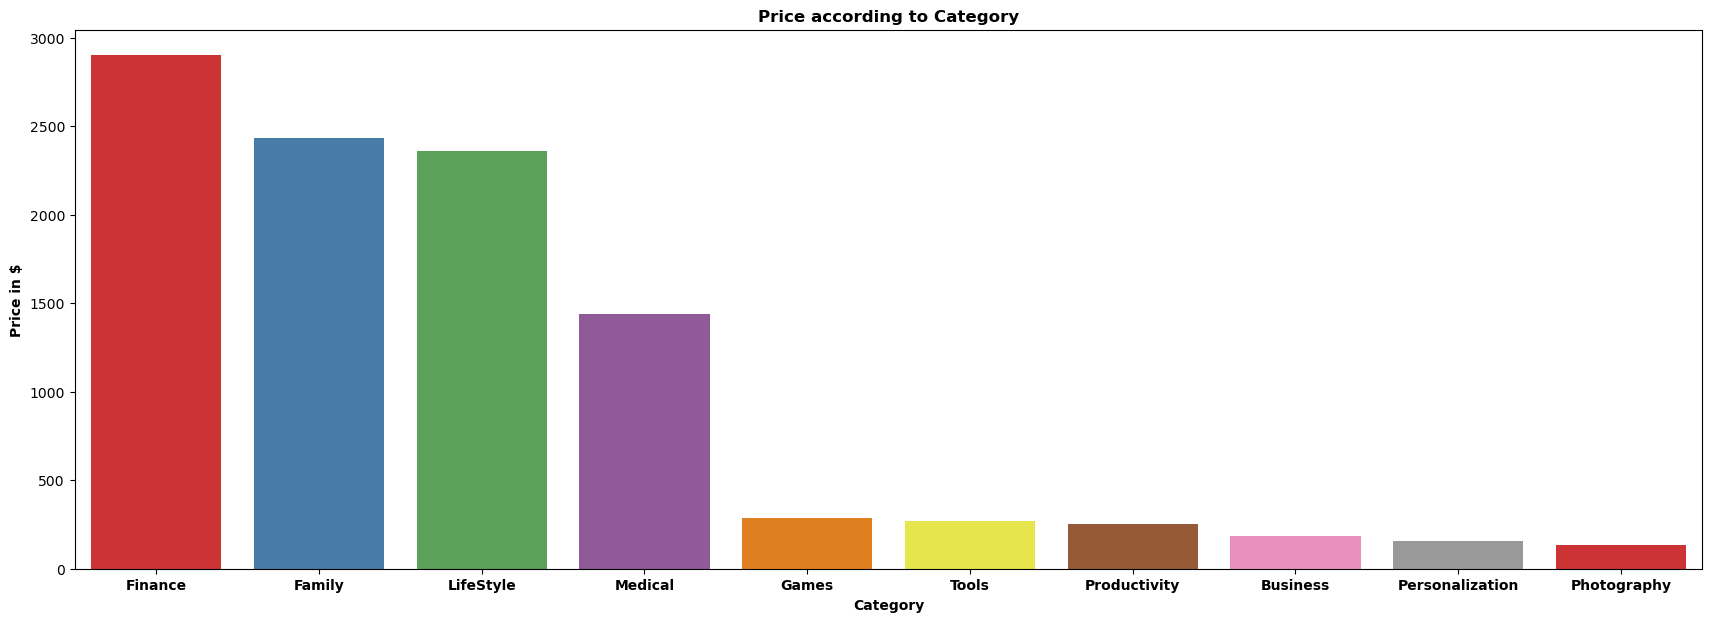

In [29]:
plt.figure(figsize=(21,7))
sns.barplot(x='Category',y='Price',data=new[0:10],palette='Set1')
plt.title('Price according to Category',weight='bold')
plt.xlabel('Category',weight='bold')
plt.ylabel('Price in $',weight='bold')
plt.xticks(np.arange(10),['Finance','Family','LifeStyle','Medical','Games','Tools','Productivity','Business','Personalization','Photography'],weight='bold')
plt.show()

## Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.


In [32]:
char_to_remove = [',','+']

for i in char_to_remove :
    df['Installs'] = df['Installs'].str.replace(i,'')

/tmp/ipykernel_70/1081051282.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(i,'')


In [39]:
df[df['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,Free,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [40]:
df = df.drop(10472).reset_index(drop=True)

In [41]:
df['Installs'] = df['Installs'].astype(int)

In [44]:
new = df.groupby(['App'])['Installs'].sum().sort_values(ascending=False).reset_index()
new.Installs = new.Installs / 1000000000

* Top 10 Most Popular Apps in Billion

In [45]:
new[0:10]

,App,Installs
0,Subway Surfers,6.0
1,Google News,4.0
2,Hangouts,4.0
3,Google Drive,4.0
4,Google Photos,4.0
5,Instagram,4.0
6,Candy Crush Saga,3.5
7,Maps - Navigate & Explore,3.0
8,Google Chrome: Fast & Secure,3.0
9,WhatsApp Messenger,3.0


## Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?


- > I will analyze the 'Installs' feature.

- > 'Installs' tells us which type of category people likes.

- > With the help of this feature we can suggest the company which type of new app should launch.

- > I will also creat an barplot so decision maker can easily make decision.

In [46]:
new = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
new['Installs'] = new['Installs'] / 1000000000
new[0:11]

,Category,Installs
0,GAME,35.086024
1,COMMUNICATION,32.647276
2,PRODUCTIVITY,14.176091
3,SOCIAL,14.069868
4,TOOLS,11.452772
5,FAMILY,10.258264
6,PHOTOGRAPHY,10.088248
7,NEWS_AND_MAGAZINES,7.496318
8,TRAVEL_AND_LOCAL,6.868887
9,VIDEO_PLAYERS,6.222003


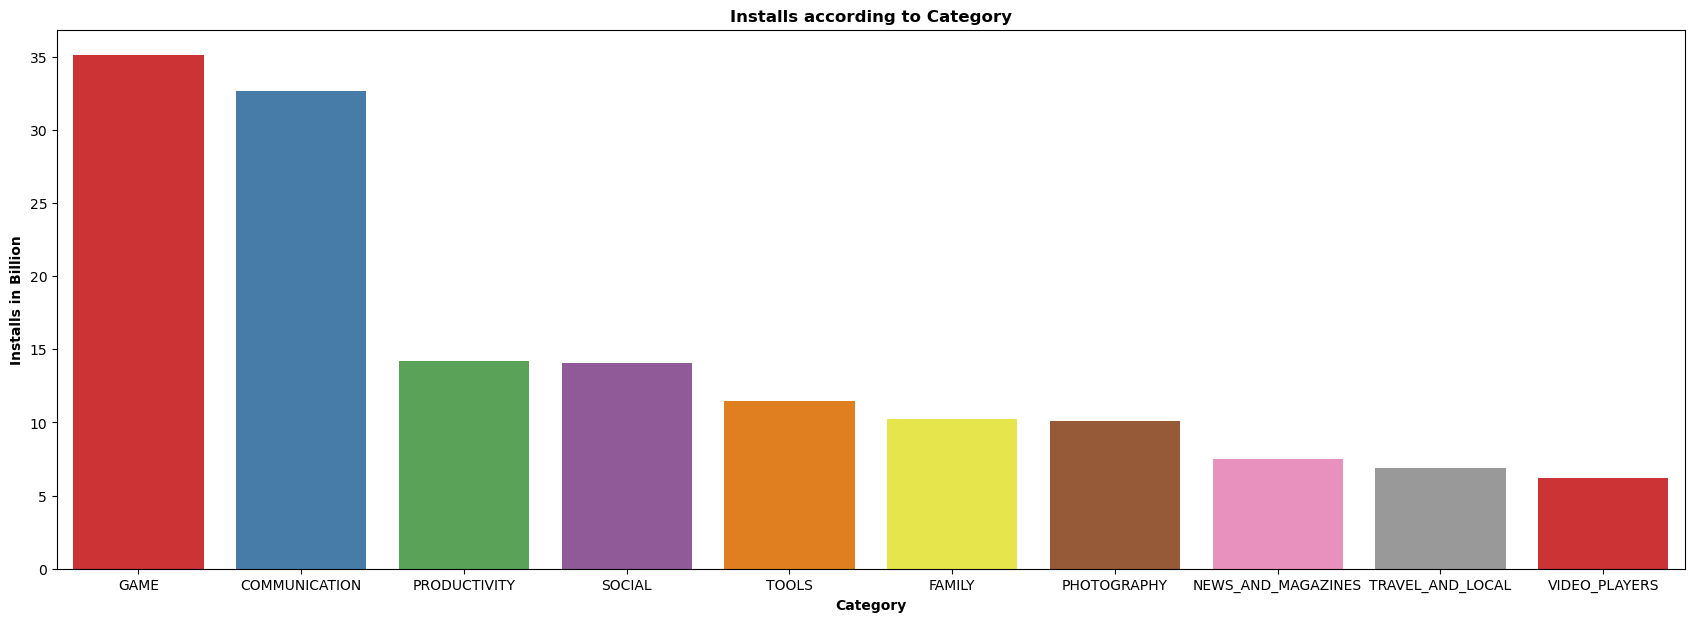

In [47]:
plt.figure(figsize=(21,7))
sns.barplot(x='Category',y='Installs',data=new[0:10],palette='Set1')
plt.title('Installs according to Category',weight='bold')
plt.xlabel('Category',weight='bold')
plt.ylabel('Installs in Billion',weight='bold')
plt.show()

## Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

- > I will analyze the 'Rating' feature because this feature rates the app and also an developer indirectly.

- > I will use pie chart to show how many successful developers are there.

<AxesSubplot: ylabel='Rating'>

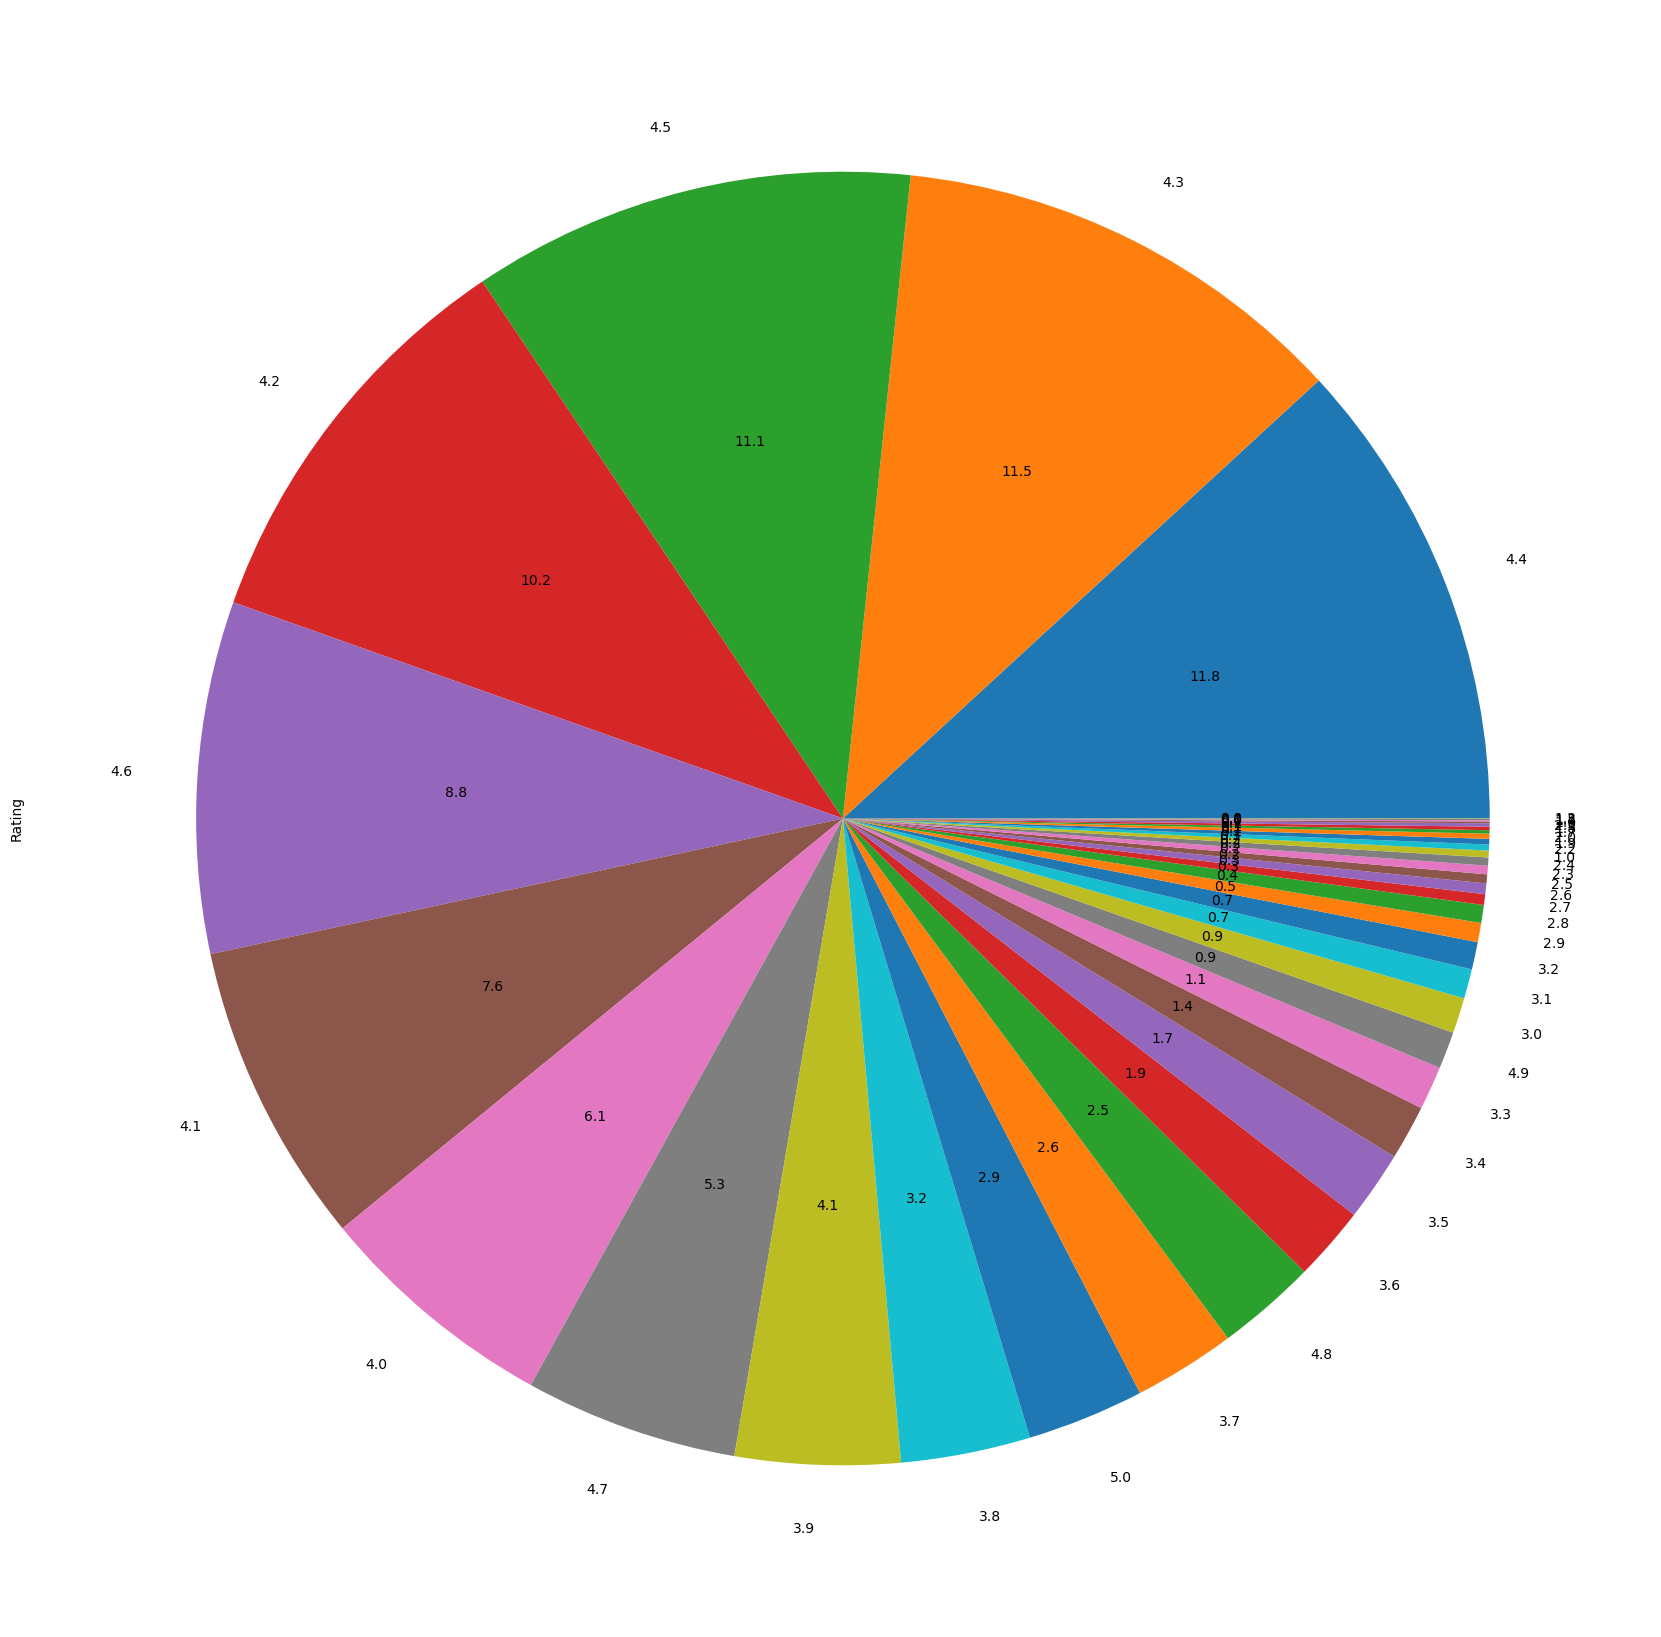

In [67]:
df['Rating'].value_counts().plot.pie(x = df['Rating'] , figsize=(21,21),autopct='%1.1f')

## - > From this pie chart we can see that there is 2.9% developers are most succesfull.

## Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [51]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- > I will analyze 'Last Updated' feature because this is the only feature that tells about time.

In [52]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [53]:
df['Month'] = df['Last Updated'].dt.month

In [56]:
new = df.groupby(['Month'])['Installs'].sum().sort_values(ascending=False).reset_index()
new.Installs = new.Installs / 1000000000
new

,Month,Installs
0,7,74.442912
1,8,68.668380
2,6,8.186208
3,5,6.232315
4,4,2.893865
5,11,1.618368
6,1,1.186499
7,3,1.186029
8,12,1.150350
9,2,1.017961


* I will use barplot to visualize it.

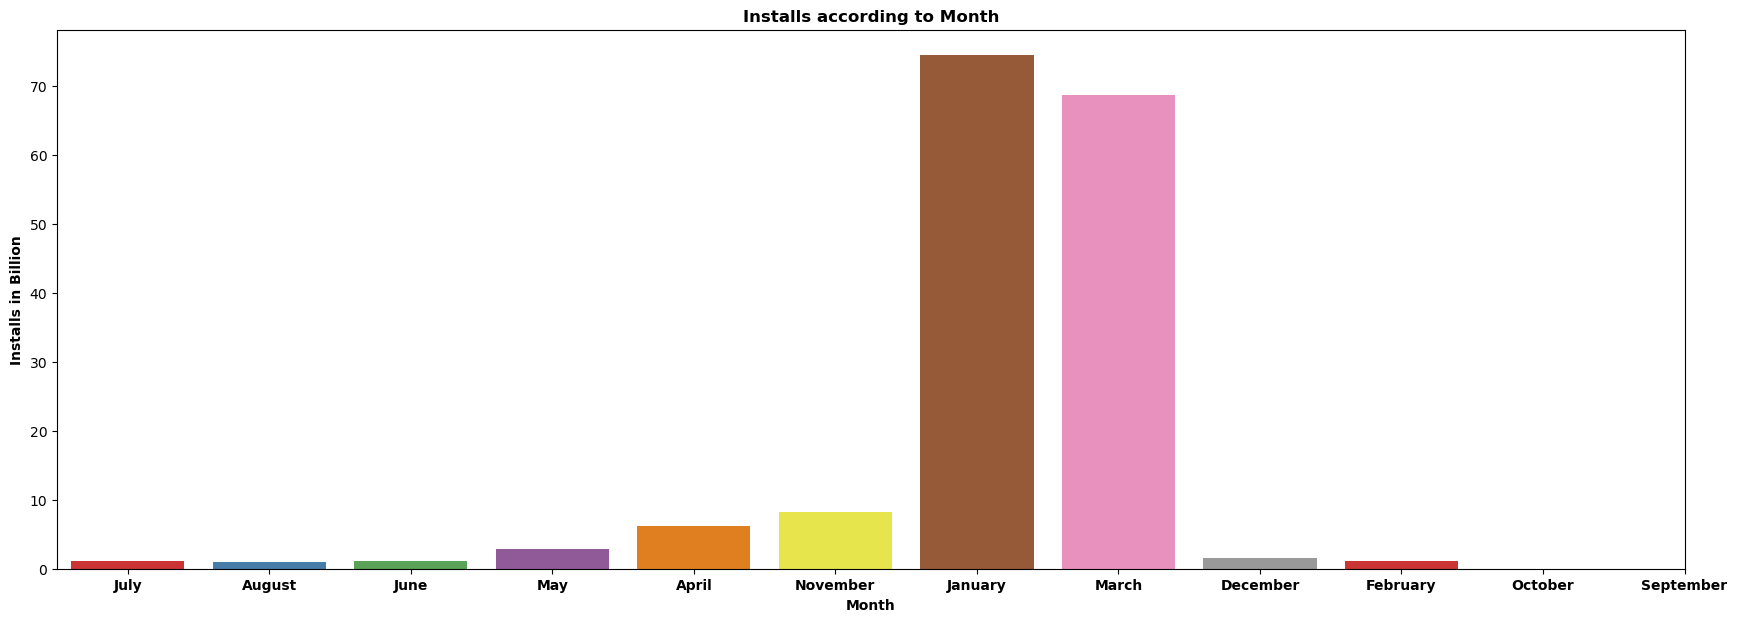

In [57]:
plt.figure(figsize=(21,7))
sns.barplot(x='Month',y='Installs',data=new[0:10],palette='Set1')
plt.title('Installs according to Month',weight='bold')
plt.xlabel('Month',weight='bold')
plt.ylabel('Installs in Billion',weight='bold')
plt.xticks(np.arange(12),['July','August','June','May','April','November','January','March','December','February','October','September'],weight='bold')
plt.show()